## Задание:

1. Построить сетевой график для максимальной (tпес) продолжи-
тельности всех его работ, рассчитать наиболее ранние и наиболее
поздние сроки наступления событий, найти критический путь, опре-
делить полные и независимые резервы времени всех работ и коэффи-
циенты напряженности некритических дуг.
2. Для трехпараметрической модели найти ожидаемое время вы-
полнения проекта, определить вероятность выполнения проекта не
позднее заданного срока, найти интервал гарантированного (с веро-
ятностью Р = 0,9973) времени выполнения проекта, оценить макси-
мально возможный срок выполнения проекта с заданной надежно-
стью.
Выполнить те же расчеты для двухпараметрической модели.
Сравнить результаты.
3. Считая tпес продолжительностью работы с минимальной допу-
стимой интенсивностью (tпес = tmax), а tопт – продолжительностью ра-
боты с максимальной возможной интенсивностью (tопт = tmin), найти
оптимальный по стоимости вариант выполнения проекта.
Минимизировать стоимость проекта при минимально возможном
сроке его исполнения.

Директивный (заданный) срок выполнения проекта Tдир = 28 дней.
Заданная надежность γ = 0,99.
Стоимость одного дня проекта равна 10 денежным единицам: S = 10.

Таблица:


| Работа | Опирается на работы  | tпес | tвер | tопт | Стоимость сокращения работы на один день, sk  |
|--------|----------------------|------|------|------|-----------------------------------------------|
| b1     | -                     | 10   | 7    | 3    | 6                                             |
| b2     | -                     | 7    | 11   | 2    | 7                                             |
| b3     | b1                   | 8    | 9    | 2    | 5                                             |
| b4     | b2                   | 6    | 6    | 1    | 8                                             |
| b5     | b3, b4               | 7    | 4    | 2    | 4                                             |
| b6     | b3, b4               | 10   | 5    | 3    | 9                                             |
| b7     | b2                   | 15   | 3    | 5    | 3                                             |
| b8     | b5                   | 9    | 10   | 3    | 10                                            |
| b9     | b5, b6, b7           | 7    | 2    | 2    | 2                                             |
| b10    | b5, b6, b7           | 11   | 5    | 5    | 5                                             |
| b11    | b8, b9               | 9    | 3    | 2    | 3                                             |

Ранние сроки: {1: 0, 2: 10, 3: 7, 4: 18, 5: 25, 6: 28, 7: 34, 8: 32, 9: 43}
Поздние сроки: {9: 43, 8: 34, 7: 34, 6: 32, 5: 25, 4: 18, 3: 12, 2: 10, 1: 0}
Критический путь: [1, 2, 4, 5, 7, 9]
Полные резервы: {(1, 2): 0, (1, 3): 5, (2, 4): 0, (3, 4): 5, (3, 6): 10, (4, 5): 0, (4, 6): 4, (5, 7): 0, (5, 8): 2, (5, 6): 7, (6, 9): 4, (7, 9): 0, (8, 7): 2}
Независимые резервы: {(1, 2): 0, (1, 3): 0, (2, 4): 0, (3, 4): 0, (3, 6): 1, (4, 5): 0, (4, 6): 0, (5, 7): 0, (5, 8): 0, (5, 6): 3, (6, 9): 0, (7, 9): 0, (8, 7): 0}
Коэффициенты напряженности некритических дуг: {(1, 3): 0.0, (3, 4): 0.0, (3, 6): 0.1, (4, 6): 0.0, (5, 8): 0.0, (5, 6): 0.42857142857142855, (6, 9): 0.0, (8, 7): 0.0}


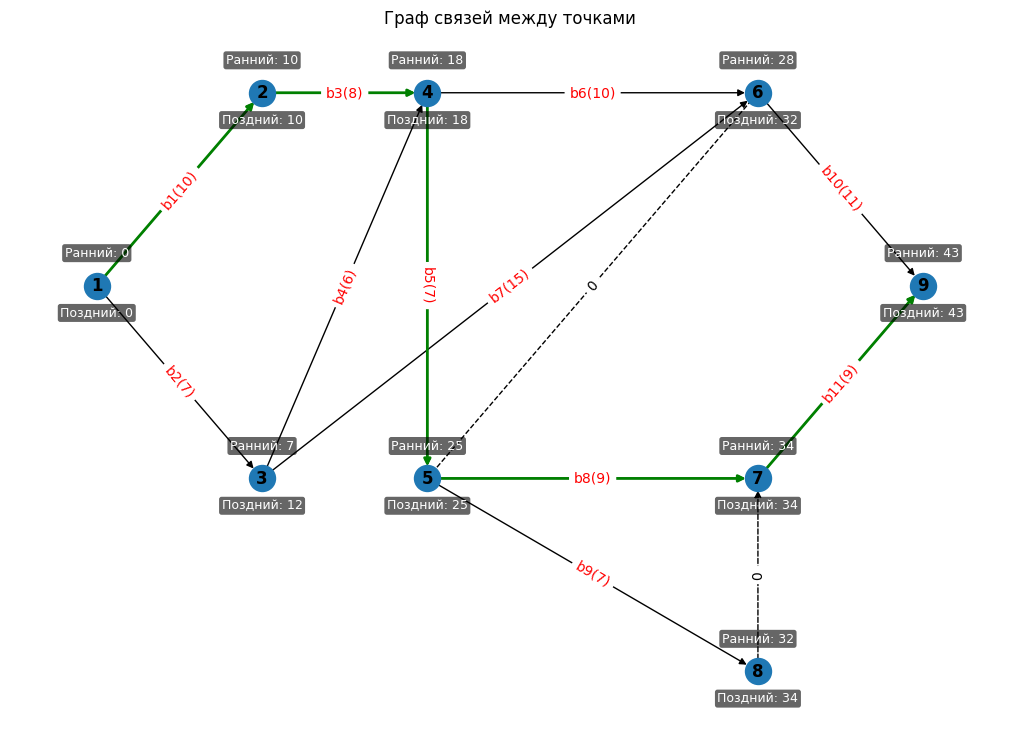

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем граф
G = nx.DiGraph()

# Регулируем расположение точек


# Определяем связи между точками
edges_points = {
    'b1(10)': (1, 2),
    'b2(7)': (1, 3),
    'b3(8)': (2, 4),
    'b4(6)': (3, 4),
    'b5(7)': (4, 5),
    'b6(10)': (4, 6),
    'b7(15)': (3, 6),
    'b8(9)': (5, 7),
    'b9(7)': (5, 8),
    'b10(11)': (6, 9),
    'b11(9)': (7, 9)
}

# Определяем связи между рёбрами
edges_edges = [
    ('b1(10)', 'b3(8)'),
    ('b2(7)', 'b4(6)'), ('b2(7)', 'b7(15)'),
    ('b3(8)', 'b5(7)'), ('b3(8)', 'b6(10)'),
    ('b4(6)', 'b5(7)'), ('b4(6)', 'b6(10)'),
    ('b5(7)', 'b8(9)'), ('b5(7)', 'b9(7)'), ('b5(7)', 'b10(11)'),
    ('b6(10)', 'b9(7)'), ('b6(10)', 'b10(11)'),
    ('b7(15)', 'b9(7)'), ('b7(15)', 'b10(11)'),
    ('b8(9)', 'b11(9)'), ('b9(7)', 'b11(9)')
]

weights = {
    'b1(10)': 10,
    'b2(7)': 7,
    'b3(8)': 8,
    'b4(6)': 6,
    'b5(7)': 7,
    'b6(10)': 10,
    'b7(15)': 15,
    'b8(9)': 9,
    'b9(7)': 7,
    'b10(11)': 11,
    'b11(9)': 9
}

# Добавляем вершины и рёбра в граф
for edge, points in edges_points.items():
    G.add_edge(points[0], points[1], label=edge, weight=weights[edge])

pos = {
    1: (10, 40),
    2: (15, 45),
    3: (15, 35),
    4: (20, 45),
    5: (20, 35),
    6: (30, 45),
    7: (30, 35),
    8: (30, 30),
    9: (35, 40)
}

# Визуализируем граф между точками
# pos = nx.spring_layout(G)

labels = nx.get_edge_attributes(G, 'label')
plt.figure(figsize=(10, 7))
nx.draw(
    G, pos, with_labels=True, node_size=350, font_weight='bold'
)


# Рисуем пунктирные ребра отдельно с явным указанием стиля
edges = nx.draw_networkx_edges(G, pos, edgelist=[(5, 6)], style='dashed', arrows=False)
G.add_edge(5, 6, label='0', weight=0)
edges = nx.draw_networkx_edges(G, pos, edgelist=[(8, 7)], style='dashed', arrows=True)
G.add_edge(8, 7, label='1', weight=0)

nx.draw_networkx_edge_labels(G, pos, edge_labels={(6, 5): 0})
nx.draw_networkx_edge_labels(G, pos, edge_labels={(8, 7): 0})

weights['0'] = 0
weights['1'] = 0

plt.title('Граф связей между точками')

# Расчет ранних сроков наступления событий (forward pass)
earliest_start = {node: float('-inf') for node in G}
earliest_start[1] = 0

for node in nx.topological_sort(G):
    for pred in G.predecessors(node):
        earliest_start[node] = max(earliest_start[node], earliest_start[pred] + G.edges[pred, node]['weight'])

# Расчет поздних сроков наступления событий (backward pass)
latest_start = {node: float('inf') for node in G}
latest_start[9] = earliest_start[9]

for node in reversed(list(nx.topological_sort(G))):
    for succ in G.successors(node):
        latest_start[node] = min(latest_start[node], latest_start[succ] - G.edges[node, succ]['weight'])

# Отображение на графе раннних и поздних сроков
for node in G.nodes:
    x, y = pos[node]
    plt.text(x, y + 0.75, 'Ранний: {}'.format(earliest_start[node]), fontsize=9, ha='center',
             bbox=dict(facecolor='black', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2'), color='white')
    plt.text(x, y - 0.8, 'Поздний: {}'.format(latest_start[node]), fontsize=9, ha='center',
             bbox=dict(facecolor='black', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2'), color='white')

# Альтернативный вариант добавления весов в ребра на графике
# for edge in G.edges.data():
#     print(edge)
#     x = pos[edge[1]][0] - (pos[edge[1]][0] - pos[edge[0]][0]) / 2
#     y = pos[edge[1]][1] - (pos[edge[1]][1] - pos[edge[0]][1]) / 2
#     plt.text(x, y - 0.65, '{}'.format(weights[edge[2]['label']]), fontsize=9, ha='center',
#              bbox=dict(facecolor='green', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2'), color='white')

# Определение критического пути
critical_path = []
for node in G.nodes:
    if earliest_start[node] == latest_start[node]:
        critical_path.append(node)

# Помечаем на графе критический путь
for u, v in G.edges:
    if u in critical_path and v in critical_path:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2.0, edge_color='green')
# Помечаем на графе названия рёбер
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=labels, font_color='red'
)

# Вычисление резервов времени
total_float = {}
free_float = {}
for u, v in G.edges:
    total_float[(u, v)] = latest_start[v] - earliest_start[u] - G[u][v]['weight']
    free_float[(u, v)] = earliest_start[v] - latest_start[u] - G[u][v]['weight']

# Коэффициенты напряженности некритических дуг
tension_coeff = {
    edge: free_float[edge] / total_float[edge] if total_float[edge] != 0 else float('inf') for edge in total_float
}

print("Ранние сроки:", earliest_start)
sorted_keys = sorted(latest_start.keys(), reverse=True)
print("Поздние сроки: {", end='')
for key in sorted_keys:
    print(key, ": ", str(latest_start[key]) + ', ' if latest_start[key] > 0 else str(latest_start[key]) + '}', end='', sep='')
print("\nКритический путь:", critical_path)
print("Полные резервы:", total_float)
print("Независимые резервы:", free_float)
print("Коэффициенты напряженности некритических дуг:", {k: v for k, v in tension_coeff.items() if v!= float('inf')})

plt.show()


In [7]:
# Продолжительности работ
t_pes = {
    (1, 2): 10, (1, 3): 7, (2, 4): 8, (3, 4): 6,
    (3, 6): 15, (4, 5): 7, (5, 7): 9, (5, 8): 7,
    (4, 6): 10, (6, 9): 11, (7, 9): 9
}
t_opt = {
    (1, 2): 3, (1, 3): 2, (2, 4): 2, (3, 4): 1,
    (3, 6): 5, (4, 5): 2, (5, 7): 3, (5, 8): 2,
    (4, 6): 3, (6, 9): 5, (7, 9): 2
}

# Стоимость сокращения
costs = {
    (1, 2): 6, (1, 3): 7, (2, 4): 5, (3, 4): 8,
    (3, 6): 3, (4, 5): 4, (5, 7): 10, (5, 8): 2,
    (4, 6): 9, (6, 9): 5, (7, 9): 3
}

# Максимальное сокращение
max_reduction = {edge: t_pes[edge] - t_opt[edge] for edge in t_pes}

# Заданный срок выполнения проекта
T_dir = 28

# Заданная надежность
gamma = 0.99

# Стоимость одного дня проекта
S = 10

# Сортировка работ по стоимости сокращения
sorted_edges = sorted(t_pes.keys(), key=lambda edge: costs[edge])

# Минимизация стоимости при заданном сроке выполнения
total_cost = 0
current_duration = earliest_start[max(G.nodes)]

while current_duration > T_dir:
    for edge in sorted_edges:
        if edge[0] in critical_path and edge[1] in critical_path and max_reduction[edge] > 0:
            reduction = min(max_reduction[edge], current_duration - T_dir)
            total_cost += costs[edge] * reduction
            current_duration -= reduction
            max_reduction[edge] -= reduction
            # Обновляем продолжительность работы на графе
            G[edge[0]][edge[1]]['weight'] -= reduction
            # Пересчитываем ранние и поздние сроки
            earliest_start = {node: 0 for node in G.nodes}
            for node in nx.topological_sort(G):
                for successor in G.successors(node):
                    earliest_start[successor] = max(earliest_start[successor], earliest_start[node] + G[node][successor]['weight'])
            latest_finish = {node: float('inf') for node in G.nodes}
            latest_finish[max(G.nodes)] = earliest_start[max(G.nodes)]
            for node in reversed(list(nx.topological_sort(G))):
                for predecessor in G.predecessors(node):
                    latest_finish[predecessor] = min(latest_finish[predecessor], latest_finish[node] - G[predecessor][node]['weight'])
            critical_path = []
            for node in G.nodes:
                if earliest_start[node] == latest_finish[node]:
                    critical_path.append(node)
            break

# Учет надежности
# Здесь предполагается, что надежность проекта не снижается ниже заданного уровня
print("\nМинимальная стоимость проекта при заданном сроке выполнения:", total_cost)
print("Общая стоимость проекта:", total_cost + S * T_dir)
print("\n")


Минимальная стоимость проекта при заданном сроке выполнения: 18
Общая стоимость проекта: 298


